## Paper Ready Visuals
Plots I have used in papers. The functions have a lot of flexibility to create plots which can show different features. Most of these visuals come from my compression project.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Set matplotlib rcParams

# The seaborn darkgrid looks nice in jupyter but does not look that good on published papers (in my opinion)
# So if you would like to use it comment the sns.set_style("whitegrid")
sns.set_theme()
sns.set_style("whitegrid")
font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)

# Get seaborn colors
cmap = ListedColormap(sns.color_palette().as_hex())
colors = sns.color_palette().as_hex()
#plt.rcParams[‘font.size’] = 15

In [3]:
# Load datasets
accuracy_df = pd.read_csv('datasets/compression/accuracies.txt')
cr_trained_miou_df = pd.read_csv('datasets/compression/cr_trained_miou.txt', delimiter=' ')
tt_all_df = pd.read_csv('datasets/compression/timings_all.csv')
tt_10_df = pd.read_csv('datasets/compression/timings_10.csv')
tt_1_df = pd.read_csv('datasets/compression/timings_1.csv')
iq_to_cr_df = pd.read_csv('datasets/compression/image_quality_cr_ratio.txt', delimiter='\t')
speedup_df = pd.read_csv('datasets/compression/speedup.txt')
#speedup_df.head()


In [4]:
plot_labels = ('Transfer Time Across Ethernet','Compression Time')
def stacked_bar_chart(x_val, bot_val, top_val, bar_width=0.8, labels=('label1', 'label2'), legend_loc='upper right',
                      y_label='y_axis', x_label='x_axis', text_axis=True, axis_offset=0, red_line_y_loc=None,
                      fig_size=(9, 6), fig_name=None):
    fig, ax = plt.subplots(figsize=fig_size)

    ax.bar(x_val, bot_val, bar_width, label=labels[0], color=colors[0])
    ax.bar(x_val, top_val, bar_width, bottom=bot_val, label=plot_labels[1], color=colors[1])

    # Used for axis offset and replace an x-tick with text
    labels = [int(item)+axis_offset for item in ax.get_xticks()]
    if text_axis:
        labels[1] = 'baseline'
    ax.set_xticklabels(labels)
    
    if red_line_y_loc is not None :
        plt.axhline(y=red_line_y_loc, color='red',linestyle='--', linewidth=0.75)
    
    ax.set_ylabel(y_label, fontsize=10)
    ax.set_xlabel(x_label, fontsize=10)
    ax.legend(loc=legend_loc, fontsize=10)
    if fig_name:
        plt.savefig(f'datasets/compression/plots/{fig_name}', bbox_inches='tight')

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/1983655355.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


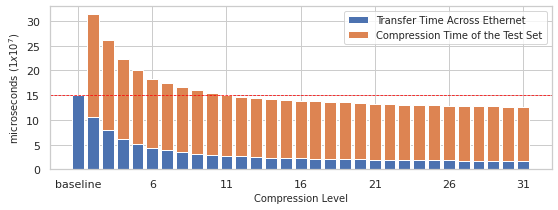

In [5]:
plot_size = (9,3)
plot_labels = ('Transfer Time Across Ethernet','Compression Time of the Test Set')
stacked_bar_chart(tt_all_df.index, tt_all_df.loc[:,'transfer_time_us']/1e7, tt_all_df.loc[:,'compression_time_us']/1e7, 
                  bar_width=0.8, labels=plot_labels, y_label='microseconds ($1x10^7$)', x_label='Compression Level',
                  red_line_y_loc=tt_all_df.loc[0,'transfer_time_us']/1e7, fig_size=plot_size, axis_offset=1, fig_name='time_plot_all.pdf')

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/1983655355.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


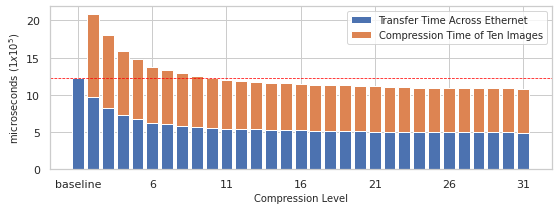

In [6]:
plot_labels = ('Transfer Time Across Ethernet','Compression Time of Ten Images')
stacked_bar_chart(tt_10_df.index, tt_10_df.loc[:,'transfer_time_us']/1e5, tt_10_df.loc[:,'compression_time_us']/1e5, 
                  bar_width=0.8, labels=plot_labels, y_label='microseconds ($1x10^5$)', x_label='Compression Level',
                  red_line_y_loc=tt_10_df.loc[0,'transfer_time_us']/1e5, fig_size=plot_size, axis_offset=1, fig_name='time_plot_10.pdf')

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/1983655355.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


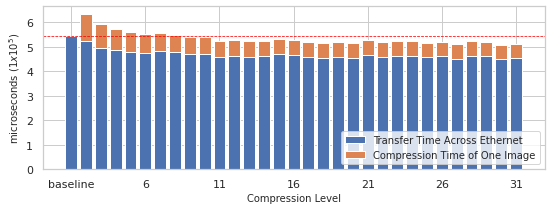

In [7]:
# Note: this plot is slightly wider because the y axis is single digits so it needs less space to represent the intervals
plot_labels = ('Transfer Time Across Ethernet','Compression Time of One Image')
stacked_bar_chart(tt_1_df.index, tt_1_df.loc[:,'transfer_time_us']/1e5, tt_1_df.loc[:,'compression_time_us']/1e5, 
                  bar_width=0.8, labels=plot_labels, y_label='microseconds ($1x10^5$)', x_label='Compression Level',
                  red_line_y_loc=tt_1_df.loc[0,'transfer_time_us']/1e5, legend_loc='lower right', fig_size=plot_size, axis_offset=1, fig_name='time_plot_1.pdf')

In [8]:
def line_plot(y_vals, x_vals=None, xlabel='Compression ratio', ylabel='mean IoU (%)', leg_label='mIoU at each CR',
              leg_loc='lower left', red_line_y_loc=None, fig_name=None, axis_offset=0, xlog=None, ylog=None, text_axis=None):
    """Create line plot with markers and seaborn background/colors.
       Pass a tuple of y data and a tuple of x data for multiple lines on the same plot.
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    
    
    y_is_tuple = isinstance(y_vals, tuple)
    if y_is_tuple: # Plot multiple line plots
        tuple_len = len(y_vals)
        if x_vals is not None:
            for index in range(tuple_len):
                plt.plot(x_vals[index], y_vals[index], marker='o', color=colors[index], label=leg_label[index], markersize=3)
        else:
            for index in range(tuple_len):
                plt.plot(y_vals[index], marker='o', color=colors[index], label=leg_label, markersize=3)
    else: # Plot 1 line plot
        if x_vals is not None:
            plt.plot(x_vals, y_vals, marker='o', color=colors[0], label=leg_label, markersize=3)
        else:
            plt.plot(y_vals, marker='o', color=colors[0], label=leg_label, markersize=3)
            
    if red_line_y_loc is not None:
        plt.axhline(y=red_line_y_loc, color='red',linestyle='--', linewidth=0.75)    
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')       
    # Used to add text to x intervals
    labels = [int(item)+axis_offset for item in ax.get_xticks()]
    if text_axis:
        labels[1] = 'baseline'
    ax.set_xticklabels(labels)
    plt.legend(loc=leg_loc)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if fig_name:
        plt.savefig(f'datasets/compression/plots/{fig_name}', bbox_inches='tight')

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/3723829149.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


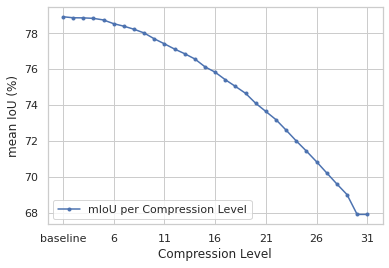

In [9]:
line_plot(accuracy_df.iloc[:,0], xlabel='Compression Level', fig_name='accuracy_line_plot.pdf', leg_label='mIoU per Compression Level', axis_offset=1, text_axis=True)

In [10]:
# Very restricted with seaborn so probably better to use matplotlib with seaborn themese (color/background)
def line_plot_sns(df):
    ax = sns.lineplot(data=df, x=df.index, y="mIoU_no_void", markers=True)
    ax.set(xlabel='mean IoU (%)', ylabel='Compression Ratio')

In [11]:
#line_plot_sns(accuracy_df)

In [12]:
def bar_plot_sns(df):
    ax = sns.barplot(data=df, x="cr", y="miou_no_void")
    ax.set(xlabel='mean IoU (%)', ylabel='Compression Ratio')

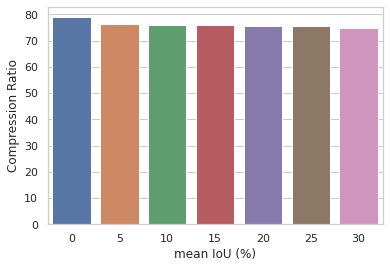

In [13]:
bar_plot_sns(cr_trained_miou_df)

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/3723829149.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


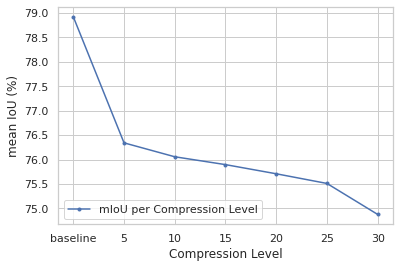

In [14]:
# This graph is not offset because we only trained on 5-30 at intervals of 5, we did not start at 6
line_plot(cr_trained_miou_df.loc[:,'miou_no_void'], cr_trained_miou_df.loc[:,'cr'], xlabel='Compression Level', 
          fig_name='cr_trained_line_plot.pdf', leg_label='mIoU per Compression Level', text_axis=True)

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/3723829149.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


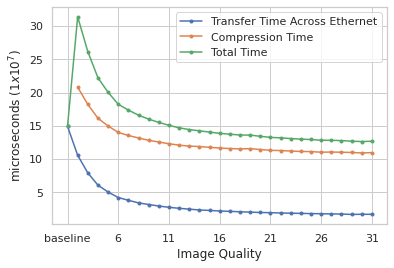

In [15]:
all_plots_y = (tt_all_df.loc[:,'transfer_time_us']/1e7, tt_all_df.loc[1:,'compression_time_us']/1e7, tt_all_df.loc[:,'total_time_us']/1e7)
all_plots_x = (tt_all_df.index, tt_all_df.index[1:], tt_all_df.index)
plot_labels = ('Transfer Time Across Ethernet','Compression Time', 'Total Time')
line_plot(all_plots_y, all_plots_x, ylabel=r'microseconds ($1x10^7$)',xlabel='Image Quality', leg_label=plot_labels,
          leg_loc='upper right', fig_name='transfer_time_all.pdf', text_axis=True, axis_offset=1)

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/3723829149.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


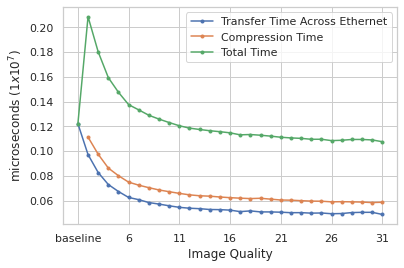

In [16]:
all_plots_y = (tt_10_df.loc[:,'transfer_time_us']/1e7, tt_10_df.loc[1:,'compression_time_us']/1e7, tt_10_df.loc[:,'total_time_us']/1e7)
all_plots_x = (tt_10_df.index, tt_10_df.index[1:], tt_10_df.index)
plot_labels = ('Transfer Time Across Ethernet','Compression Time', 'Total Time')
line_plot(all_plots_y, all_plots_x, ylabel=r'microseconds ($1x10^7$)',xlabel='Image Quality', leg_label=plot_labels,
          leg_loc='upper right', fig_name='transfer_time_10_images.pdf', text_axis=True, axis_offset=1)

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/3723829149.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


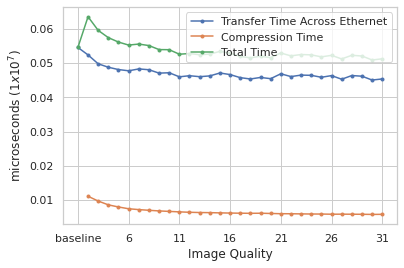

In [17]:
all_plots_y = (tt_1_df.loc[:,'transfer_time_us']/1e7, tt_1_df.loc[1:,'compression_time_us']/1e7, tt_1_df.loc[:,'total_time_us']/1e7)
all_plots_x = (tt_1_df.index, tt_1_df.index[1:], tt_1_df.index)
plot_labels = ('Transfer Time Across Ethernet','Compression Time', 'Total Time')
line_plot(all_plots_y, all_plots_x, ylabel=r'microseconds ($1x10^7$)',xlabel='Image Quality', leg_label=plot_labels,
          leg_loc='upper right', fig_name='transfer_time_1_image.pdf', text_axis=True, axis_offset=1)

In [18]:
#line_plot(tt_all_df.loc[:,'transfer_time_per_image'], ylabel='microseconds', xlabel='Image Quality', leg_label='test',
#          leg_loc='upper right', axis_offset=1)

In [19]:
def bar_chart(x_val, y_val, bar_width=0.8, leg_label='label1', legend_loc='upper right',
                      y_label='y_axis', x_label='x_axis', text_axis=None, axis_offset=0, red_line_y_loc=None,
                      fig_name=None):
    fig, ax = plt.subplots()

    ax.bar(x_val, y_val, bar_width, label=leg_label, color=colors[0])

    # Used for axis offset and replace an x-tick with text
    labels = [int(item)+axis_offset for item in ax.get_xticks()]
    if text_axis:
        labels[1] = text_axis#'baseline'
    ax.set_xticklabels(labels)
    
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    if leg_label:
        ax.legend(loc=legend_loc, fontsize=12)
    if fig_name:
        plt.savefig(f'datasets/compression/plots/{fig_name}', bbox_inches='tight')

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/1323544619.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


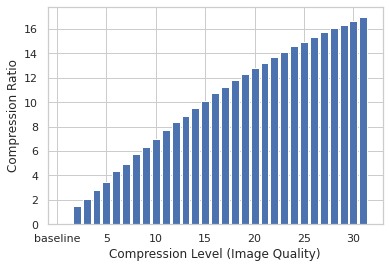

In [20]:
leg_label='Compression Ratio for \neach Image Quality Level'
bar_chart(iq_to_cr_df.loc[:, 'iq'], iq_to_cr_df.loc[:, 'cr'], bar_width=0.8, leg_label=None, text_axis='baseline',
          y_label='Compression Ratio', x_label='Compression Level (Image Quality)', legend_loc='upper left', 
          fig_name='iq_to_cr.pdf')

/local_scratch/pbs.137695.pbs02/ipykernel_2547415/3723829149.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


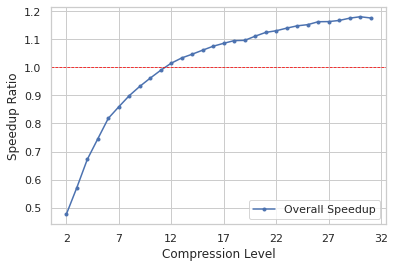

In [21]:
line_plot(speedup_df.loc[:,'Speedup'], xlabel='Compression Level', ylabel='Speedup Ratio', red_line_y_loc=1.0,
          fig_name='speedup_test_set.pdf', leg_label='Overall Speedup', leg_loc='lower right', axis_offset=2)